In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb

In [28]:
data = pd.read_csv('/Users/carternorton/Desktop/RCC/deconvolution/output.txt', sep="\t", index_col=0)

data.index = data.index.str.replace("HSC", "Hematopoietic Stem Cell")
data.index = data.index.str.replace("ly Endothelial cells", "Lymphatic \n Endothelial cells")
data.index = data.index.str.replace("mv Endothelial cells", "Microvascular \n Endothelial cells")

#Let's remove any columns that don't end in .01
data = data[data.columns[data.columns.str.endswith('.01')]]

#Then remove the last three characters from the column names
data.columns = data.columns.str[:-3]

#then replace . with - in column names
data.columns = data.columns.str.replace('.', '-')

data.head()


,TCGA-V4-A9EE,TCGA-VD-AA8N,TCGA-V4-A9EI,TCGA-VD-AA8O,TCGA-WC-A888,TCGA-WC-A881,TCGA-WC-A88A,TCGA-YZ-A980,TCGA-V4-A9EO,TCGA-WC-A87U,...,TARGET-51-PAJMFS,TARGET-51-PAJLWU,TARGET-51-PAKWMM,TARGET-51-PALFYG,TARGET-51-PAJPFB,TARGET-51-PAJNCV,TARGET-51-PAJLIV,TARGET-51-PALFEF,TARGET-51-PALEIR,TARGET-51-PAEALX
aDC,5.877000e-02,1.138000e-01,4.302000e-02,8.711000e-02,2.079000e-01,3.754000e-02,4.793000e-02,4.031000e-02,9.455000e-03,2.303000e-02,...,-5.904000e-18,0.040260,1.027000e-18,2.933000e-18,-8.621000e-19,1.604000e-19,2.539000e-18,5.867000e-19,-2.628000e-18,1.127000e-18
Adipocytes,1.375000e-19,3.926000e-03,3.663000e-21,-2.367000e-21,-5.244000e-20,-3.711000e-19,-3.813000e-19,2.841000e-02,-7.923000e-20,5.818000e-19,...,3.725000e-03,0.005302,0.000000e+00,0.000000e+00,1.292000e-03,3.458000e-03,2.054000e-03,-2.607000e-21,1.476000e-19,7.855000e-20
Astrocytes,-1.621000e-17,-2.176000e-17,-1.587000e-17,-2.469000e-17,-2.434000e-17,-1.716000e-17,-1.515000e-17,-3.341000e-18,-1.432000e-17,-2.206000e-17,...,1.778000e-01,0.150800,6.384000e-02,1.867000e-01,1.286000e-01,1.347000e-01,1.457000e-01,1.484000e-01,1.377000e-01,1.433000e-01
B-cells,4.805000e-02,3.549000e-02,2.253000e-02,3.487000e-02,2.304000e-01,4.584000e-02,2.445000e-02,-1.367000e-18,2.883000e-02,1.637000e-02,...,2.164000e-19,0.008645,3.926000e-02,-7.429000e-19,3.662000e-03,4.831000e-03,5.926000e-03,1.568000e-02,1.704000e-02,1.700000e-02
Basophils,6.992000e-02,2.074000e-01,1.173000e-01,1.978000e-01,1.843000e-01,1.881000e-01,1.598000e-01,2.855000e-01,1.450000e-01,1.325000e-01,...,3.065000e-01,0.320800,1.893000e-01,2.745000e-01,3.465000e-01,3.364000e-01,3.097000e-01,3.607000e-01,3.049000e-01,2.996000e-01


In [29]:
#Let's only select for samples from our demo sheet
demo = pd.read_csv('/Users/carternorton/Desktop/RCC/KIRC_BMI.csv', index_col=0)
demo.index = demo.index.str.replace(".", "-")

#Only include columns in data that are in the index of demo
study_samples = demo.index
study_samples = study_samples[study_samples.isin(data.columns)]

data = data[study_samples]
data.head()

,TCGA-CZ-4857,TCGA-CZ-4858,TCGA-CZ-4860,TCGA-CZ-4861,TCGA-CZ-4863,TCGA-CZ-4864,TCGA-CZ-4865,TCGA-CZ-5452,TCGA-CZ-5454,TCGA-CZ-5455,...,TCGA-B0-5702,TCGA-B0-5703,TCGA-B0-5705,TCGA-B0-5707,TCGA-B0-5709,TCGA-B0-5710,TCGA-B0-5711,TCGA-B0-5712,TCGA-B0-5713,TCGA-B0-5812
aDC,0.11390,0.16370,1.014000e-01,1.247000e-01,1.609000e-01,0.161400,1.277000e-01,1.501000e-01,1.043000e-01,0.15500,...,0.13880,-2.162000e-19,1.309000e-01,0.06317,0.2354,9.992000e-02,9.444000e-02,0.07226,1.142000e-01,1.112000e-01
Adipocytes,0.06180,0.01864,1.077000e-01,-3.371000e-19,6.775000e-03,0.012240,2.230000e-02,5.124000e-02,-3.779000e-20,0.02106,...,0.15170,4.905000e-02,4.677000e-02,0.04797,0.0953,2.633000e-20,1.068000e-20,0.01464,2.997000e-02,1.260000e-02
Astrocytes,0.13590,0.21810,-2.596000e-18,-8.027000e-19,5.722000e-02,0.001876,1.642000e-01,5.426000e-19,8.449000e-03,0.04050,...,0.10310,2.564000e-02,-2.730000e-19,0.07252,0.1725,9.418000e-02,5.431000e-02,0.05032,4.616000e-02,9.156000e-02
B-cells,0.06743,0.11550,8.097000e-02,1.196000e-01,4.881000e-02,0.118200,3.153000e-21,2.082000e-01,1.277000e-01,0.09756,...,0.01507,-2.750000e-18,3.567000e-02,0.04904,0.1151,-7.892000e-19,2.645000e-02,0.02360,-6.527000e-19,2.708000e-18
Basophils,0.04148,0.15570,9.914000e-02,1.447000e-01,3.195000e-19,0.077730,1.856000e-02,8.333000e-02,8.856000e-02,0.05992,...,0.22380,1.168000e-01,8.468000e-02,0.07273,0.1389,7.187000e-02,9.300000e-02,0.08532,1.014000e-01,5.399000e-02


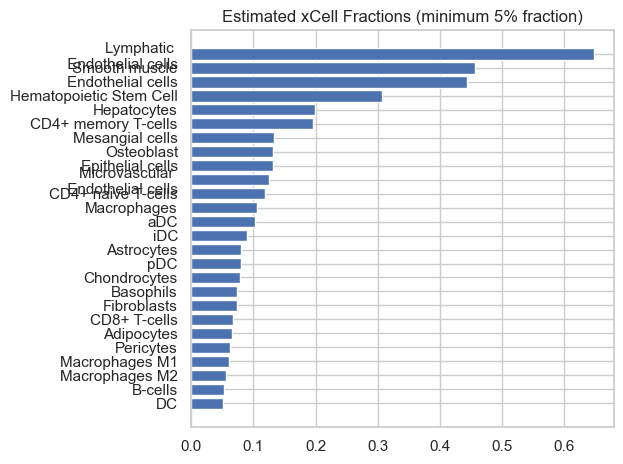

In [31]:
#Let's make an average column of each row
data['average'] = data.mean(axis=1)

#Let's make a bar graph of the average expression of each cell
avgs = data['average'].sort_values(ascending=True)
avgs = avgs[avgs > .05]
plt.barh(avgs.index, avgs)
plt.title("Estimated xCell Fractions (minimum 5% fraction)")
plt.tight_layout()
plt.savefig('/Users/carternorton/Desktop/RCC/deconvolution/estimated_xCell_fractions.png')
plt.show()




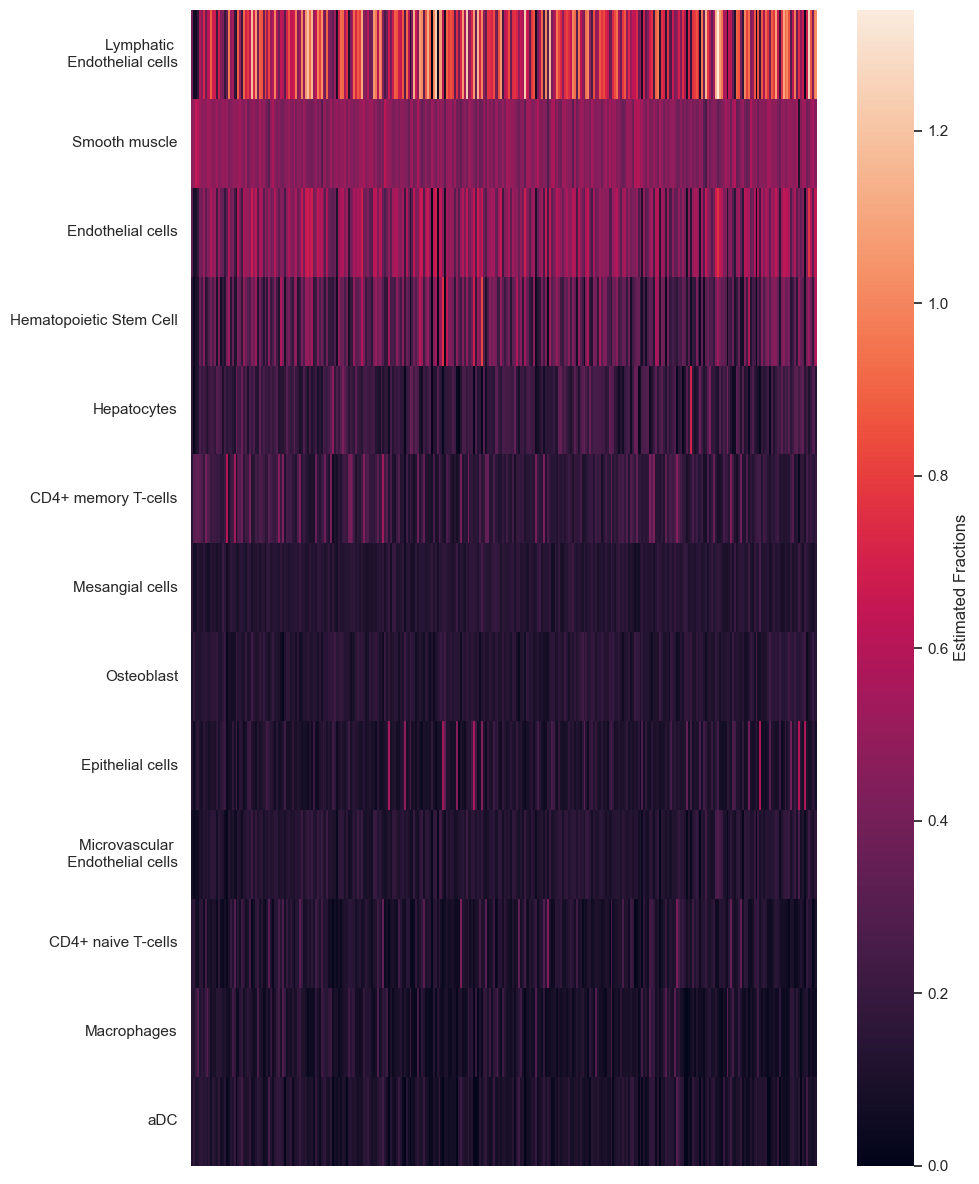

In [32]:

plt.figure(figsize=(10,12))
sb.heatmap(data[data["average"] > .1].sort_values(by="average", ascending=False).drop(columns=["average"]), cbar_kws={"label": "Estimated Fractions"})
#Remove x ticks
plt.xticks([])
plt.tight_layout()
plt.savefig("/Users/carternorton/Desktop/RCC/deconvolution/deconvolution_heatmap.png")

<Figure size 1000x1500 with 0 Axes>

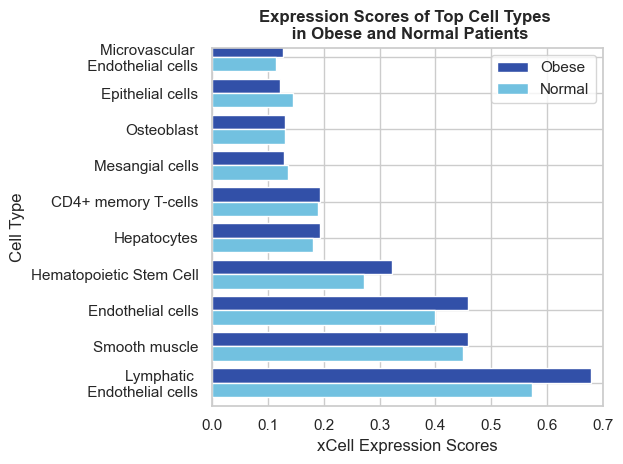

In [34]:
#Let's load in BMI information
bmi = pd.read_csv('/Users/carternorton/Desktop/RCC/KIRC_BMI.csv', index_col=0)


#Let's take the top ten cell types, and plot their average expression in each BMI category
top_ten = data['average'].sort_values(ascending=False).index[:10]

#Get the index of all patients with obese in the BMI column
obese = bmi[bmi['bmi'] == 'obese'].index.to_list()
normal = bmi[bmi['bmi'] == 'normal'].index.to_list()

obese = [x.replace(".", "-") for x in obese]
obese = [x for x in obese if x in data.columns]
normal = [x.replace(".", "-") for x in normal]
normal = [x for x in normal if x in data.columns]



#Now let's plot the average expression of each cell type in obese and normal patients in a single matched bar graph
obese_avgs = data.loc[top_ten, obese].mean(axis=1) 
normal_avgs = data.loc[top_ten, normal].mean(axis=1)

#Let's make a matched bar graph with obese and normal avgs
sb.set_theme(style="whitegrid", font="Arial")
plt.figure(figsize=(10, 15))
fig, ax = plt.subplots()
obese_avgs.plot(kind='barh', color='#3250a8', ax=ax, position=0, width=.4)
normal_avgs.plot(kind='barh', color='#72c1e0', ax=ax, position=1, width=.4)

#Add a legend
plt.legend(["Obese", "Normal"])
plt.xlim(0, .7)
plt.xlabel("xCell Expression Scores")
plt.ylabel("Cell Type")
plt.title("Expression Scores of Top Cell Types \n in Obese and Normal Patients", fontweight='bold')
plt.tight_layout()
plt.savefig("/Users/carternorton/Desktop/RCC/Plots/obese_normal_bar_graph.png")


